In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
import yfinance as yf

In [3]:
tickers = ["ADVANC.BK", "PTT.BK", "SCB.BK", "KBANK.BK", "CPALL.BK"]

In [6]:
dowload_data = yf.download(tickers, start="2023-01-01", end="2024-01-01", progress=False)

In [7]:
data = dowload_data['Close']
data

Ticker,ADVANC.BK,CPALL.BK,KBANK.BK,PTT.BK,SCB.BK
Date,,,,,
2023-01-03 00:00:00+00:00,194.5,69.50,149.0,32.75,107.0
2023-01-04 00:00:00+00:00,197.0,69.00,151.5,32.00,109.0
2023-01-05 00:00:00+00:00,201.0,69.00,151.0,32.25,110.5
2023-01-06 00:00:00+00:00,201.0,70.25,153.0,32.50,113.0
2023-01-09 00:00:00+00:00,203.0,73.00,154.5,33.00,114.0
...,...,...,...,...,...
2023-12-22 00:00:00+00:00,221.0,55.50,131.5,35.25,104.0
2023-12-25 00:00:00+00:00,221.0,55.25,131.0,35.50,103.5
2023-12-26 00:00:00+00:00,219.0,56.00,132.0,35.75,104.0


In [8]:
split_idx = int(data.shape[0] * 0.9)
train_data = data.iloc[:split_idx, :].copy()
test_data = data.iloc[split_idx:, :].copy()

In [9]:
from itertools import chain, combinations

In [10]:
items = data.columns

In [11]:
coins_list = list(chain.from_iterable(combinations(items, r) for r in range(2, len(items) + 1)))
coins_list

[('ADVANC.BK', 'CPALL.BK'),
 ('ADVANC.BK', 'KBANK.BK'),
 ('ADVANC.BK', 'PTT.BK'),
 ('ADVANC.BK', 'SCB.BK'),
 ('CPALL.BK', 'KBANK.BK'),
 ('CPALL.BK', 'PTT.BK'),
 ('CPALL.BK', 'SCB.BK'),
 ('KBANK.BK', 'PTT.BK'),
 ('KBANK.BK', 'SCB.BK'),
 ('PTT.BK', 'SCB.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'PTT.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'SCB.BK'),
 ('ADVANC.BK', 'KBANK.BK', 'PTT.BK'),
 ('ADVANC.BK', 'KBANK.BK', 'SCB.BK'),
 ('ADVANC.BK', 'PTT.BK', 'SCB.BK'),
 ('CPALL.BK', 'KBANK.BK', 'PTT.BK'),
 ('CPALL.BK', 'KBANK.BK', 'SCB.BK'),
 ('CPALL.BK', 'PTT.BK', 'SCB.BK'),
 ('KBANK.BK', 'PTT.BK', 'SCB.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK', 'PTT.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK', 'SCB.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'PTT.BK', 'SCB.BK'),
 ('ADVANC.BK', 'KBANK.BK', 'PTT.BK', 'SCB.BK'),
 ('CPALL.BK', 'KBANK.BK', 'PTT.BK', 'SCB.BK'),
 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK', 'PTT.BK', 'SCB.BK')]

In [12]:
len(coins_list)

26

In [13]:
26 / 2

13.0

Eigenvector for Portfolio 1 ('ADVANC.BK', 'CPALL.BK') with 2 coins:
[ 5.96149578 -1.09588415]


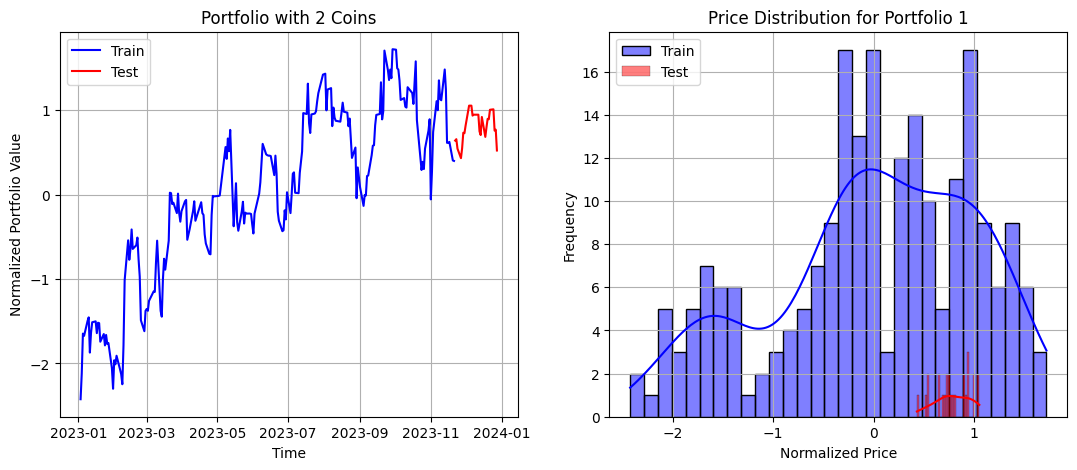

Eigenvector for Portfolio 2 ('ADVANC.BK', 'KBANK.BK') with 2 coins:
[0.42679403 1.18291645]


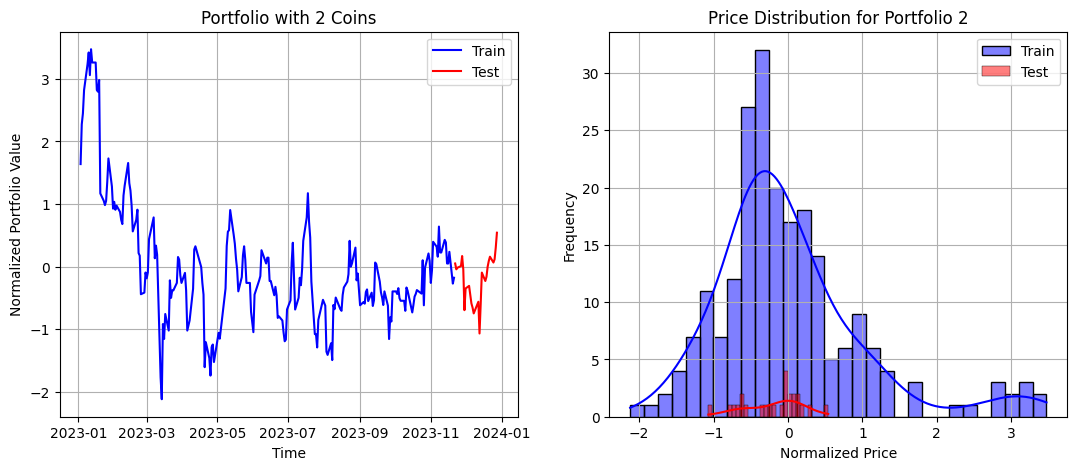

Eigenvector for Portfolio 3 ('ADVANC.BK', 'PTT.BK') with 2 coins:
[4.60701265 3.59898882]


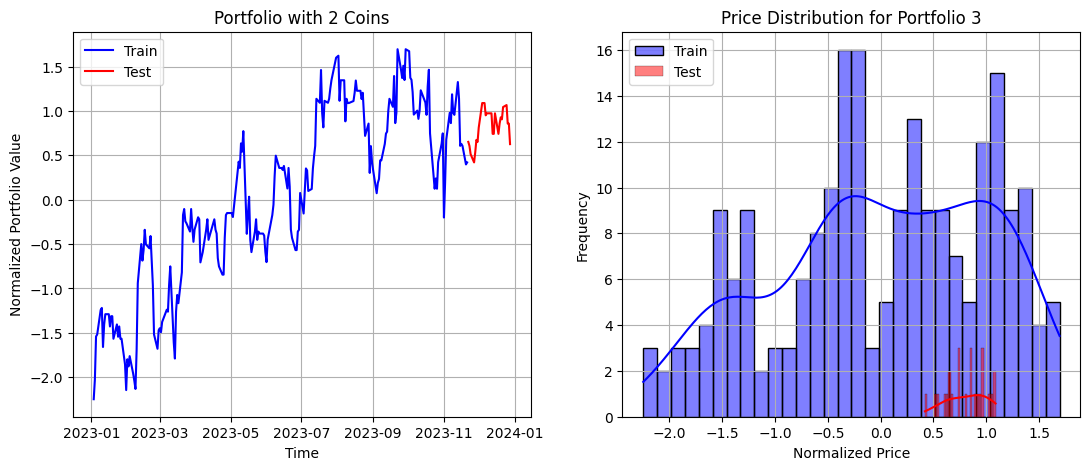

Eigenvector for Portfolio 4 ('ADVANC.BK', 'SCB.BK') with 2 coins:
[ 4.02695445 -0.1701886 ]


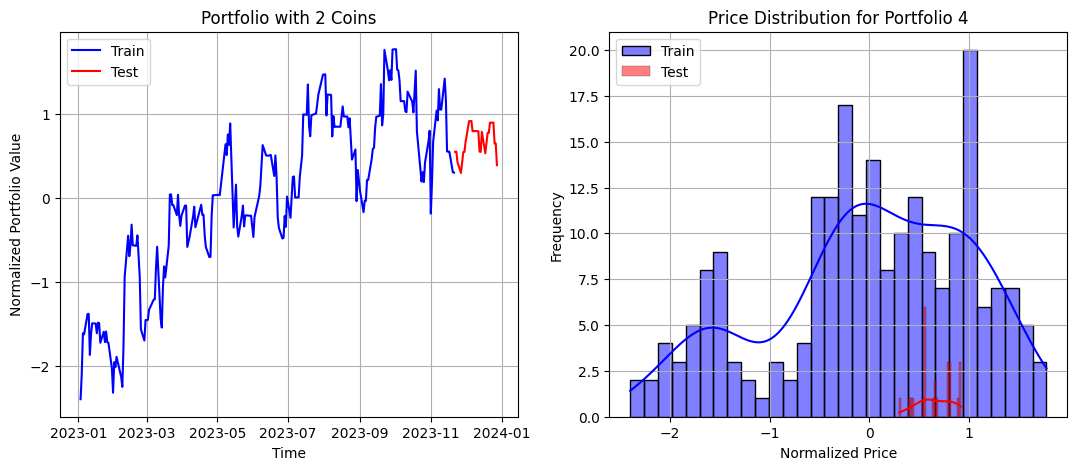

Eigenvector for Portfolio 5 ('CPALL.BK', 'KBANK.BK') with 2 coins:
[ 5.82259182 -5.7607223 ]


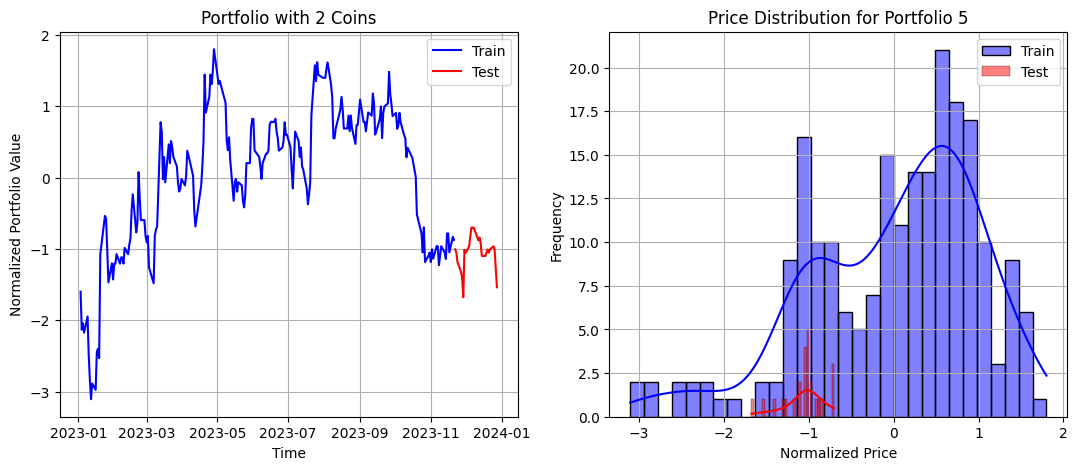

Eigenvector for Portfolio 6 ('CPALL.BK', 'PTT.BK') with 2 coins:
[2.14636564 0.41136085]


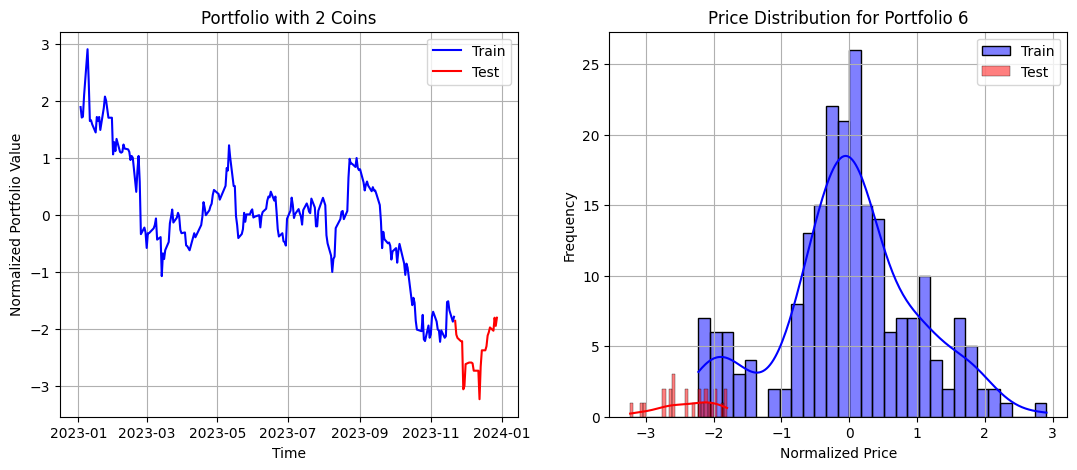

Eigenvector for Portfolio 7 ('CPALL.BK', 'SCB.BK') with 2 coins:
[ 5.77158784 -1.8508134 ]


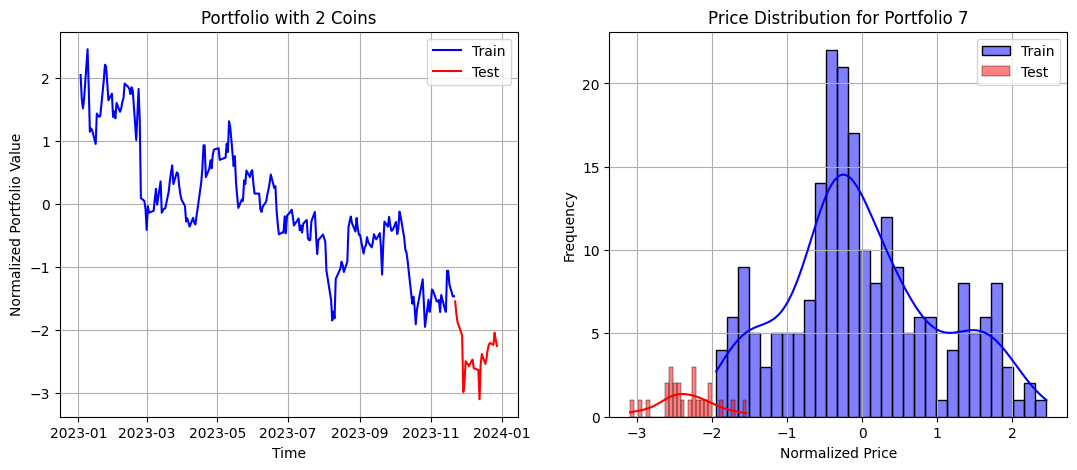

Eigenvector for Portfolio 8 ('KBANK.BK', 'PTT.BK') with 2 coins:
[ 1.79149927 -4.30446496]


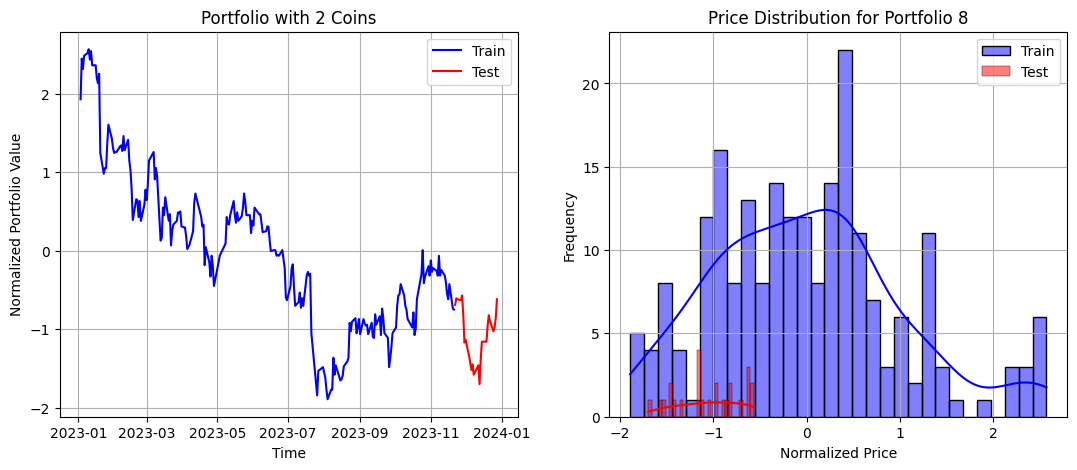

Eigenvector for Portfolio 9 ('KBANK.BK', 'SCB.BK') with 2 coins:
[ 8.22619043 -3.15767789]


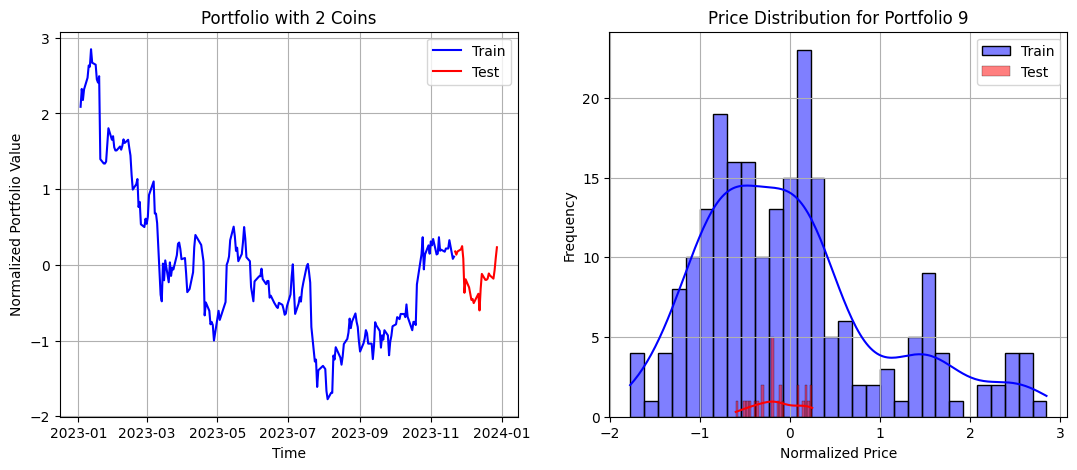

Eigenvector for Portfolio 10 ('PTT.BK', 'SCB.BK') with 2 coins:
[ 5.78406825 -2.7671419 ]


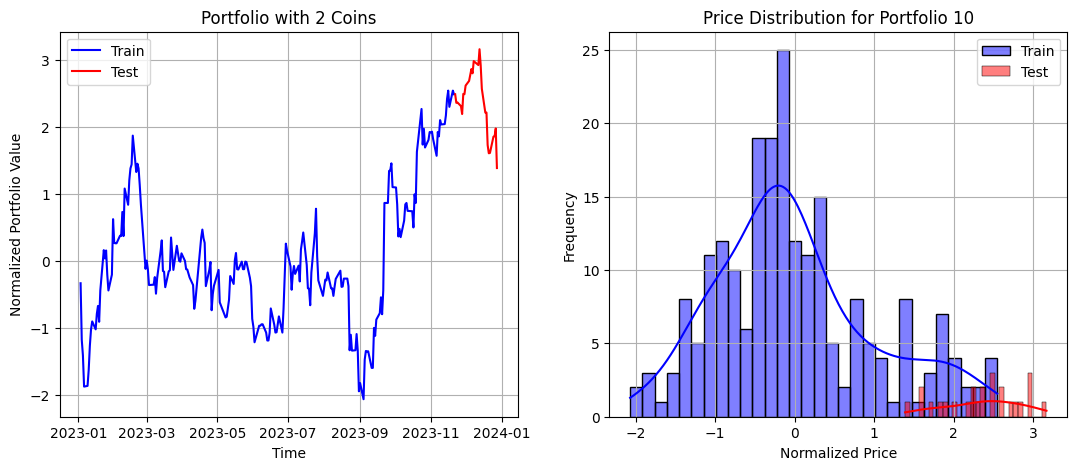

Eigenvector for Portfolio 11 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK') with 3 coins:
[ 6.32310084e+13  4.59618771e+13 -1.25429255e+13]


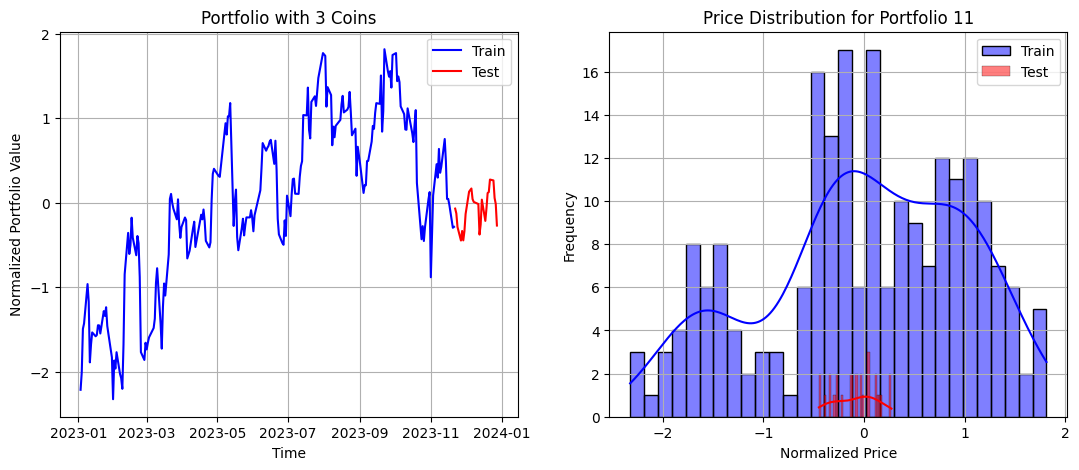

Eigenvector for Portfolio 12 ('ADVANC.BK', 'CPALL.BK', 'PTT.BK') with 3 coins:
[ 7.46601829e+13 -6.73701260e+13 -4.43665399e+13]


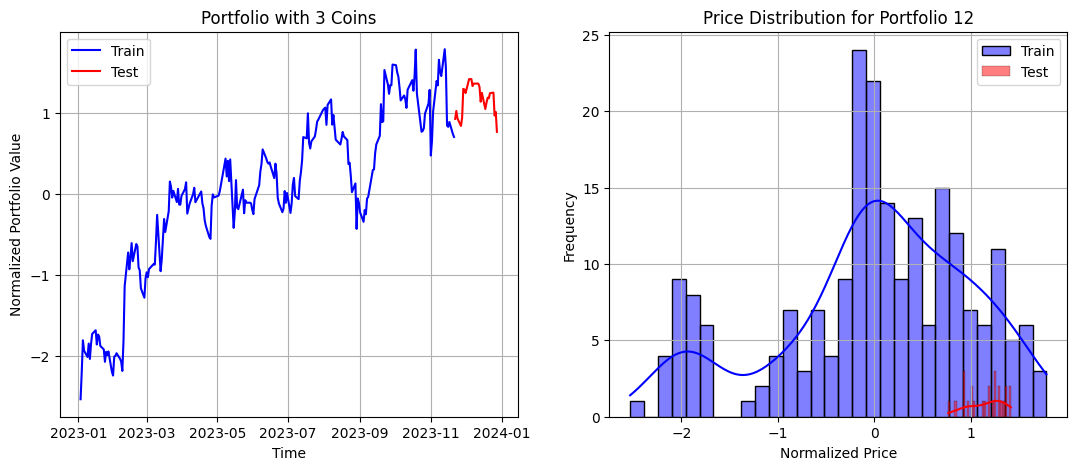

Eigenvector for Portfolio 13 ('ADVANC.BK', 'CPALL.BK', 'SCB.BK') with 3 coins:
[ 2.19844727e+13 -6.30686834e+13 -2.09856633e+13]


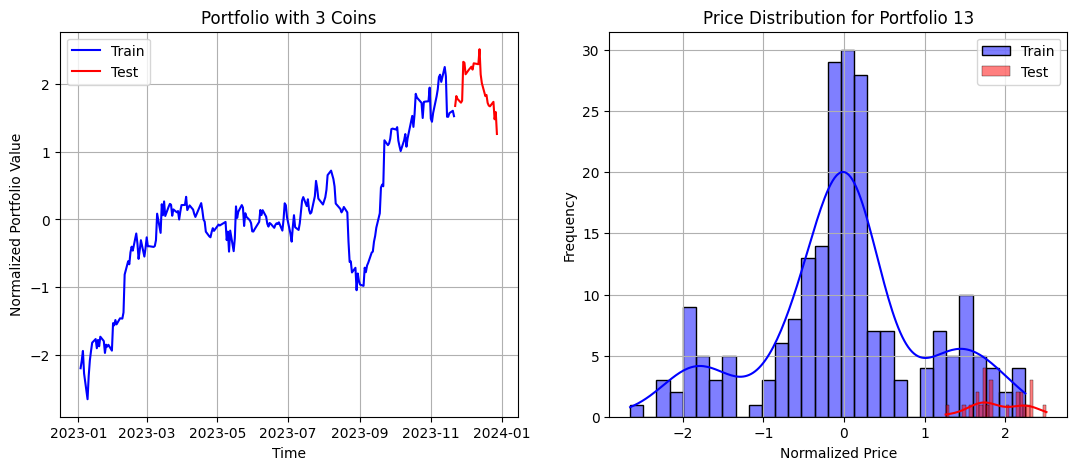

Eigenvector for Portfolio 14 ('ADVANC.BK', 'KBANK.BK', 'PTT.BK') with 3 coins:
[ 1.02872953e+13 -1.94924409e+13  9.82437877e+13]


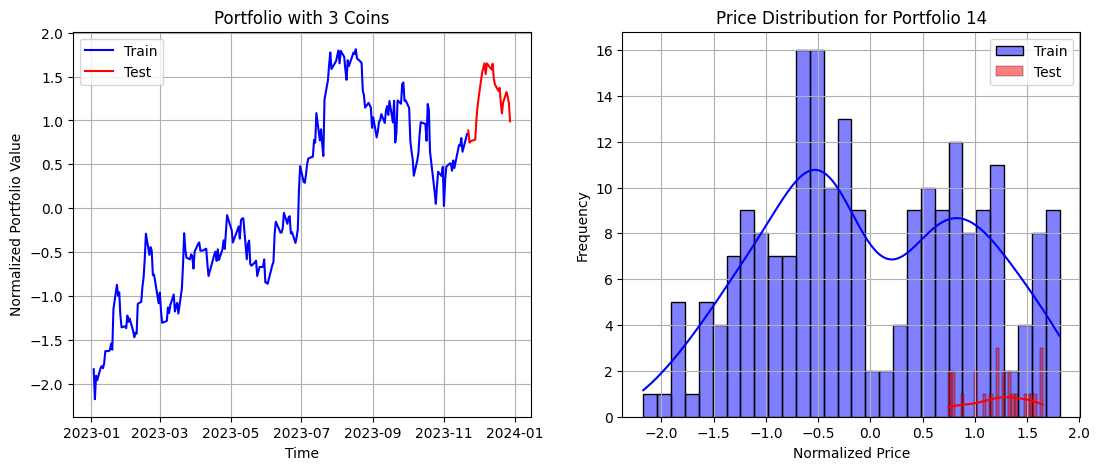

Eigenvector for Portfolio 15 ('ADVANC.BK', 'KBANK.BK', 'SCB.BK') with 3 coins:
[ 6.99823482e+13  3.08194500e+13 -5.84836790e+13]


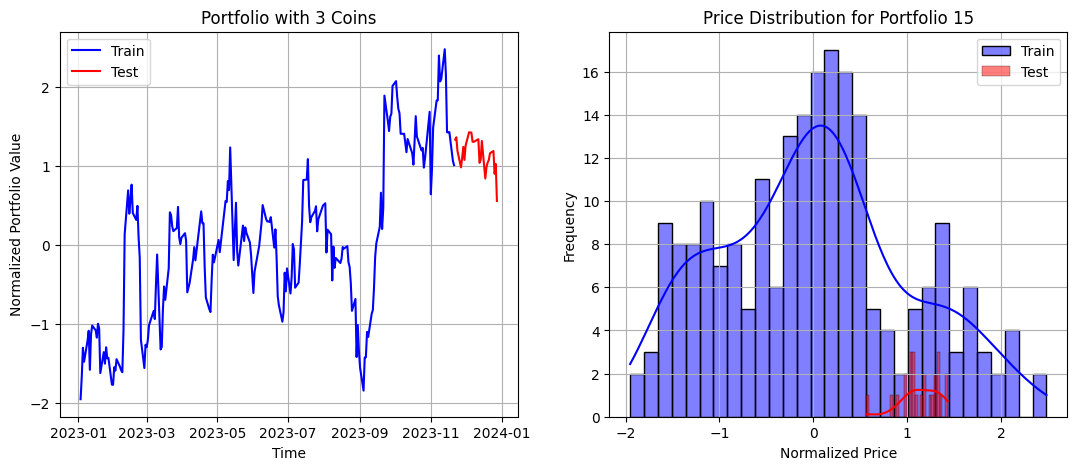

Eigenvector for Portfolio 16 ('ADVANC.BK', 'PTT.BK', 'SCB.BK') with 3 coins:
[ 7.73357156e+12  1.80057044e+14 -1.08615887e+12]


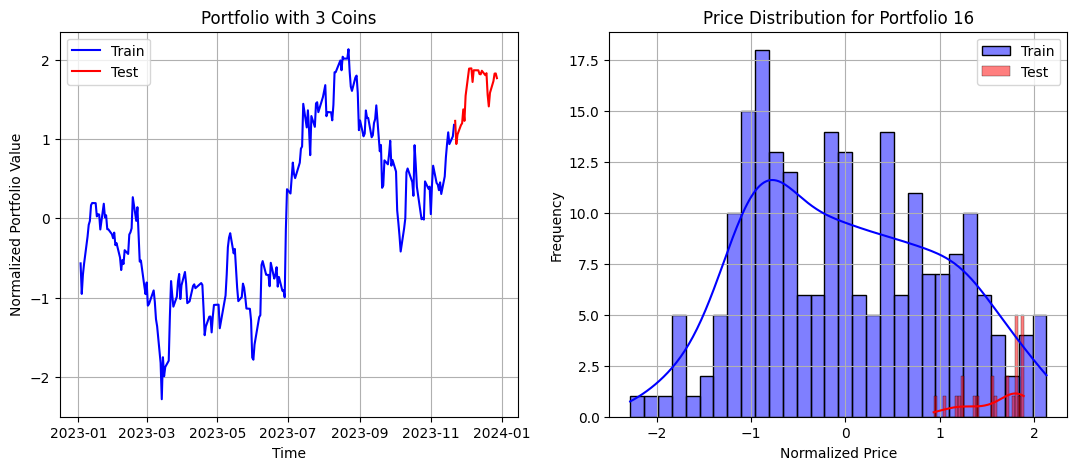

Eigenvector for Portfolio 17 ('CPALL.BK', 'KBANK.BK', 'PTT.BK') with 3 coins:
[ 6.10132548e+13 -1.39437582e+13 -2.20060116e+14]


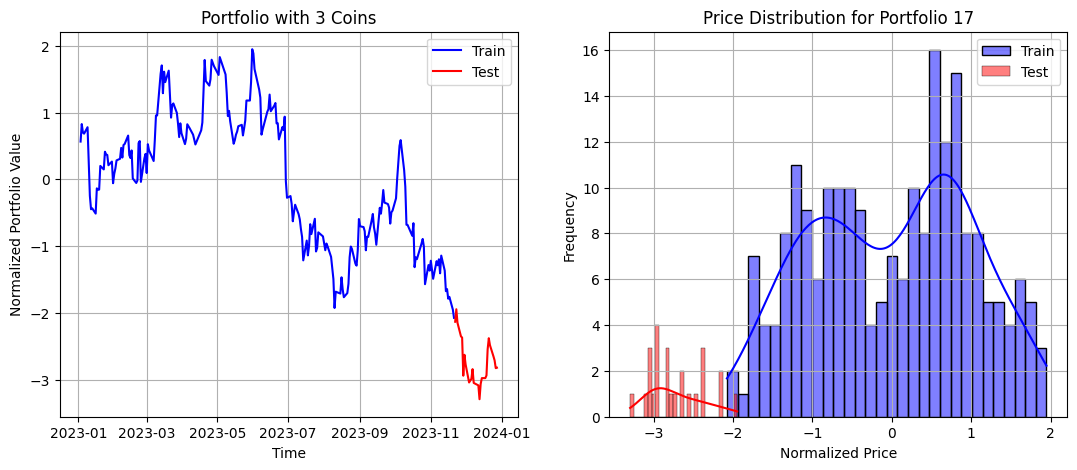

Eigenvector for Portfolio 18 ('CPALL.BK', 'KBANK.BK', 'SCB.BK') with 3 coins:
[ 1.00720663e+14 -4.11416656e+12  2.16975621e+12]


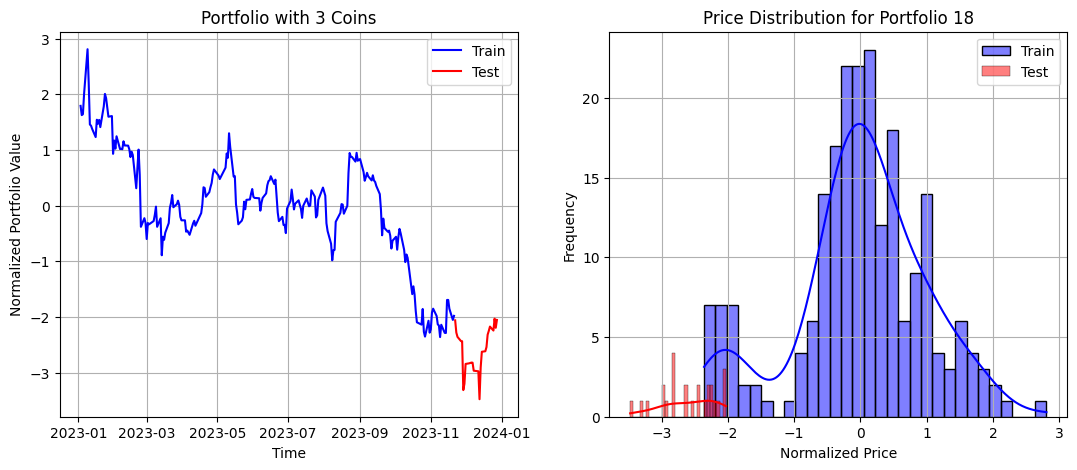

Eigenvector for Portfolio 19 ('CPALL.BK', 'PTT.BK', 'SCB.BK') with 3 coins:
[ 1.94299854e+14 -1.82093709e+13 -9.90428752e+13]


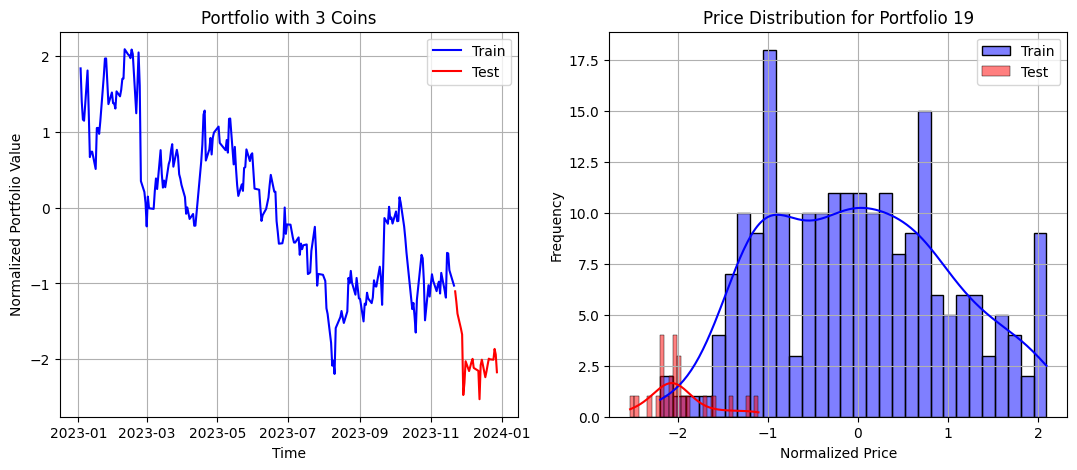

Eigenvector for Portfolio 20 ('KBANK.BK', 'PTT.BK', 'SCB.BK') with 3 coins:
[ 9.31587702e+13 -1.34952645e+14 -2.91532280e+13]


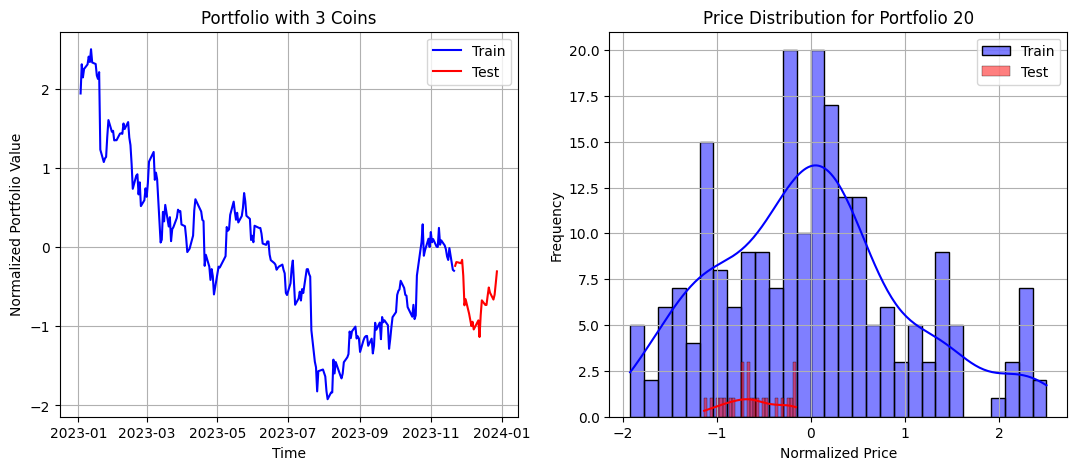

Eigenvector for Portfolio 21 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK', 'PTT.BK') with 4 coins:
[6.70285874e+13 7.45538495e+13 6.95274001e+12 3.47515103e+12]


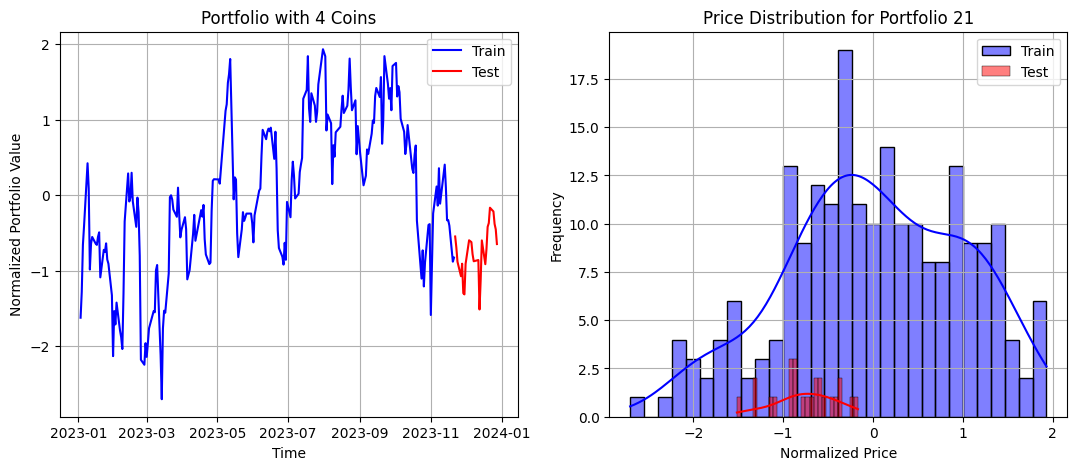

Eigenvector for Portfolio 22 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK', 'SCB.BK') with 4 coins:
[ 3.76187214e+13 -8.44409676e+13  2.03801159e+11 -3.11331203e+13]


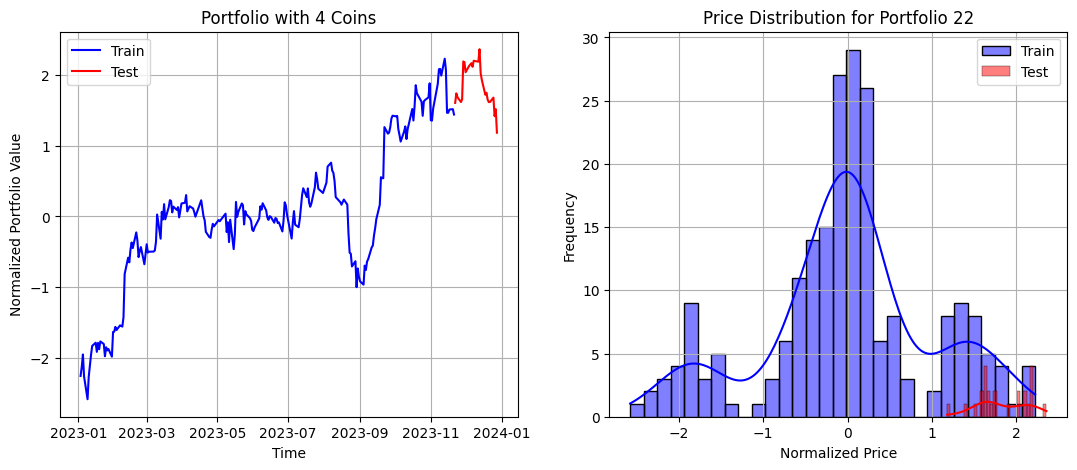

Eigenvector for Portfolio 23 ('ADVANC.BK', 'CPALL.BK', 'PTT.BK', 'SCB.BK') with 4 coins:
[ 6.72655581e+13 -7.06933269e+13  8.86194855e+13 -1.53393783e+13]


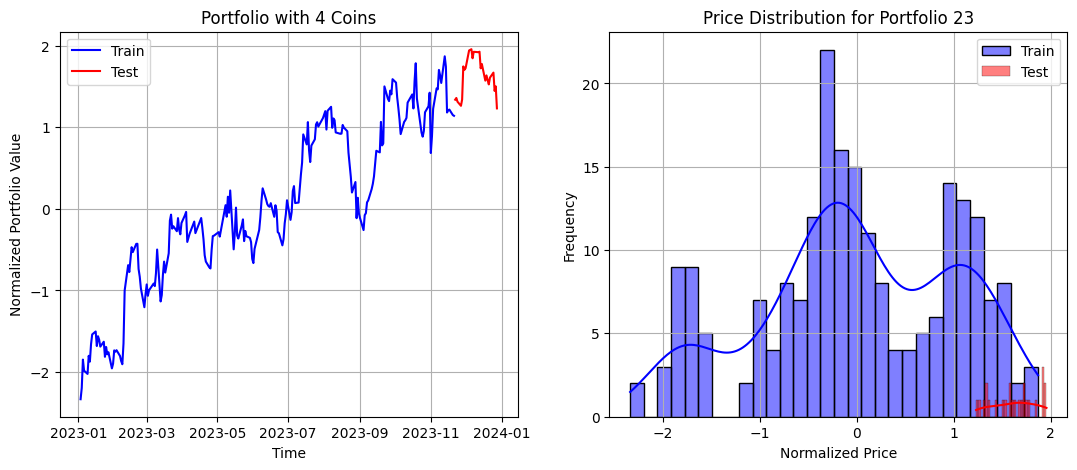

Eigenvector for Portfolio 24 ('ADVANC.BK', 'KBANK.BK', 'PTT.BK', 'SCB.BK') with 4 coins:
[ 3.57429558e+12 -3.37203057e+13  2.09166436e+14  1.25705851e+13]


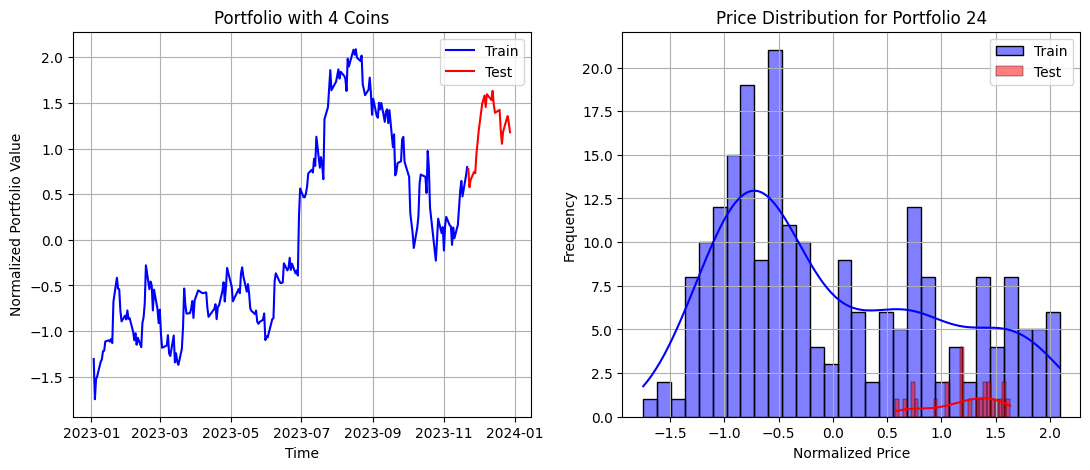

Eigenvector for Portfolio 25 ('CPALL.BK', 'KBANK.BK', 'PTT.BK', 'SCB.BK') with 4 coins:
[ 4.63352615e+13 -2.99762034e+13  1.44617363e+14 -7.41749258e+13]


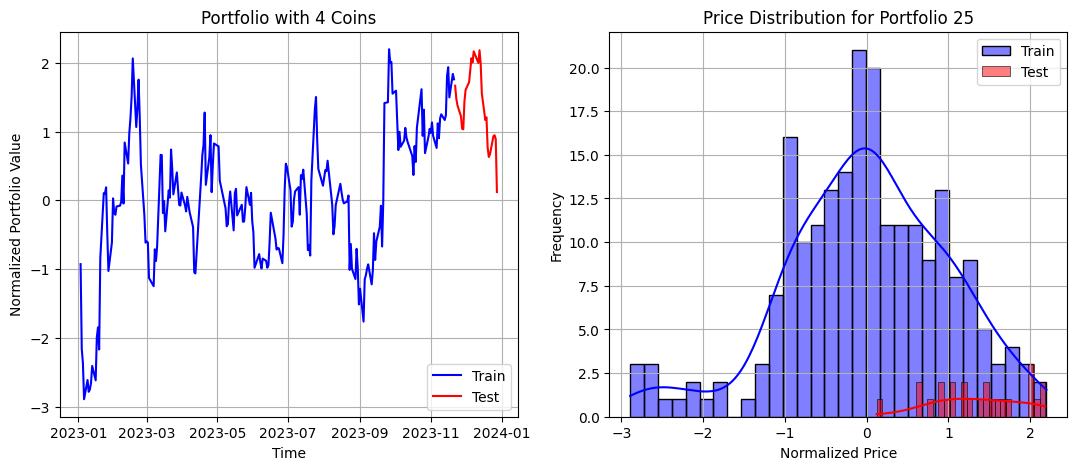

Eigenvector for Portfolio 26 ('ADVANC.BK', 'CPALL.BK', 'KBANK.BK', 'PTT.BK', 'SCB.BK') with 5 coins:
[ 4.33287350e+13 -3.95593709e+13 -4.46778683e+13  5.72846416e+13
 -2.00453089e+13]


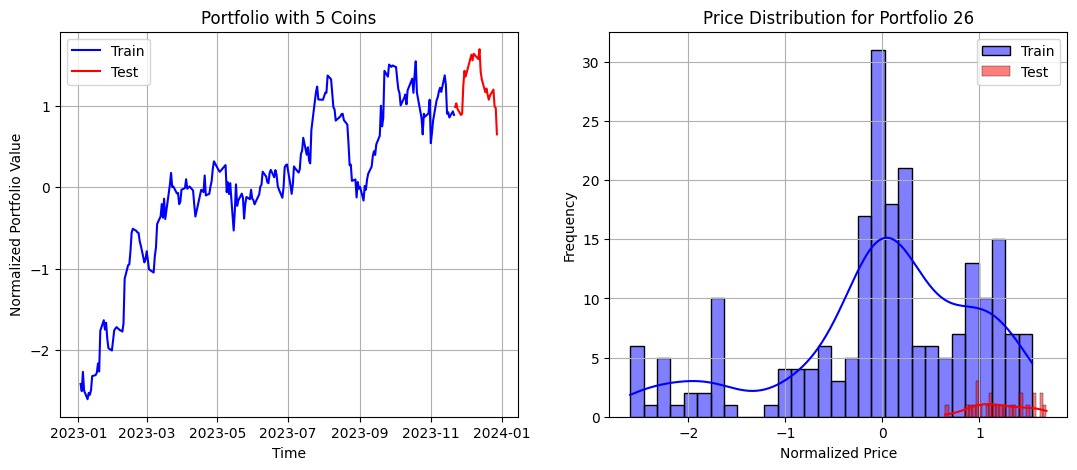

In [14]:
for i, coins in enumerate(coins_list, start=1):
    # Extract closing prices
    price_matrix_train = train_data.loc[:, coins].to_numpy()
    price_matrix_test = test_data.loc[:, coins].to_numpy()

    # Perform Johansen Cointegration Test
    johansen_test = coint_johansen(price_matrix_train, det_order=1, k_ar_diff=60)
    cointegration_vector = johansen_test.evec[:, 0]

    # Print eigenvector for each case
    print(f"Eigenvector for Portfolio {i} {coins} with {len(coins)} coins:")
    print(cointegration_vector)

    # Create portfolios
    portfolio_train = price_matrix_train @ cointegration_vector
    portfolio_test = price_matrix_test @ cointegration_vector

    # Normalize portfolios
    normalized_portfolio_train = (portfolio_train - np.mean(portfolio_train)) / np.std(portfolio_train)
    normalized_portfolio_test = (portfolio_test - np.mean(portfolio_train)) / np.std(portfolio_train)

    train_data[f"portfolio_{i}"] = normalized_portfolio_train
    test_data[f"portfolio_{i}"] = normalized_portfolio_test

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    axes = axes.flatten()

    ax1 = axes[0]
    ax1.plot(train_data.index, train_data.loc[:, f"portfolio_{i}"], label="Train", color="blue")
    ax1.plot(test_data.index, test_data.loc[:, f"portfolio_{i}"], label="Test", color="red")
    ax1.set_title(f"Portfolio with {len(coins)} Coins")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Normalized Portfolio Value")
    ax1.legend()
    ax1.grid()

     # Visualize distribution of portfolio prices
    ax2 = axes[1]
    sns.histplot(normalized_portfolio_train, bins=30, kde=True, color="blue", label="Train", ax=ax2)
    sns.histplot(normalized_portfolio_test, bins=30, kde=True, color="red", label="Test", ax=ax2)
    ax2.set_title(f"Price Distribution for Portfolio {i}")
    ax2.set_xlabel("Normalized Price")
    ax2.set_ylabel("Frequency")
    ax2.legend()
    ax2.grid()
        
    plt.show()